En este notebook se intenta corregir los problemas de Multicolinealidad y Target Leakage

In [117]:
# Importing necessary libraries:

import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
import pickle
from scipy import stats

In [11]:
# import dataset

path = r'Data\data.csv'
dataset = pd.read_csv(path)
df = dataset.copy()

In [12]:
df = df.drop('id', axis=1)

In [13]:
X = df.drop('state', axis=1)
Y = pd.get_dummies(df['state'], prefix='state', drop_first=True)
print(X.shape)
print();print(Y.shape)

(1888, 43)

(1888, 1)


In [5]:
Y = Y.rename(columns={'state_retired' : 'state'})

Multicolinealidad

![Multicolinealidad](./Data%20Wrangler%20Screenshots/Multicolinealidad.jpg)

In [6]:
X.columns

Index(['age', 'antiquity', 'salary', 'area_CUSTOMER SUCCESS',
       'area_TALENT POOL', 'area_GROWTH', 'area_PEOPLE DEVELOPMENT',
       'area_RETAIL_FINANCIAL_BD', 'area_PRAGMA_REGIONES', 'area_AWS PREMIER',
       'area_FINANCIAL AND WEALTH MANAGEMENT', 'area_TALENT ACQUISITION',
       'chapter_BACKEND', 'chapter_FRONTEND', 'chapter_INTEGRACION',
       'chapter_MOVIL', 'chapter_LIDERAZGO', 'chapter_EXPERIENCIA_USUARIO',
       'chapter_CLOUD OPS', 'chapter_ARQUITECTURA', 'chapter_CIENCIA DE DATOS',
       'chapter_GROWTH_', 'chapter_CALIDAD DE SOFTWARE', 'chapter_DEVSECOPS',
       'chapter_COMERCIAL', 'chapter_CERTIFICACION', 'chapter_FRONT MOVIL',
       'chapter_BUSINESS CONSULTING', 'chapter_ECOMMERCE', 'chapter_HEAD',
       'chapter_UI', 'chapter_INFRAESTRUCTURA', 'chapter_SOA',
       'chapter_AGILISMO', 'chapter_RESEARCH', 'chapter_TI',
       'seniority_ADVANCED', 'seniority_JUNIOR', 'seniority_SENIOR',
       'seniority_MASTER', 'seniority_TRAINEE', 'sex_MASCULINO',
    

In [15]:
cols_to_drop =['chapter_GROWTH_', 'chapter_DEVSECOPS', 'chapter_COMERCIAL', 'chapter_CERTIFICACION', 'chapter_FRONT MOVIL',
            'chapter_BUSINESS CONSULTING', 'chapter_ECOMMERCE', 'chapter_HEAD', 'chapter_UI', 'chapter_CALIDAD DE SOFTWARE',
            'chapter_INFRAESTRUCTURA', 'chapter_AGILISMO', 'chapter_RESEARCH', 'chapter_TI']

In [16]:
X = X.drop(cols_to_drop, axis=1)

In [17]:
X.shape

(1888, 29)

Target Leakage

![TargetLeakage](./Data%20Wrangler%20Screenshots/target%20leakage.jpg)

In [18]:
X.columns

Index(['age', 'antiquity', 'salary', 'area_CUSTOMER SUCCESS',
       'area_TALENT POOL', 'area_GROWTH', 'area_PEOPLE DEVELOPMENT',
       'area_RETAIL_FINANCIAL_BD', 'area_PRAGMA_REGIONES', 'area_AWS PREMIER',
       'area_FINANCIAL AND WEALTH MANAGEMENT', 'area_TALENT ACQUISITION',
       'chapter_BACKEND', 'chapter_FRONTEND', 'chapter_INTEGRACION',
       'chapter_MOVIL', 'chapter_LIDERAZGO', 'chapter_EXPERIENCIA_USUARIO',
       'chapter_CLOUD OPS', 'chapter_ARQUITECTURA', 'chapter_CIENCIA DE DATOS',
       'chapter_SOA', 'seniority_ADVANCED', 'seniority_JUNIOR',
       'seniority_SENIOR', 'seniority_MASTER', 'seniority_TRAINEE',
       'sex_MASCULINO', 'sex_FEMENINO'],
      dtype='object')

In [19]:
cols_to_drop = ['area_TALENT ACQUISITION', 'chapter_CIENCIA DE DATOS', 'area_AWS PREMIER', 'area_FINANCIAL AND WEALTH MANAGEMENT', 'area_PRAGMA_REGIONES',
                'area_GROWTH','area_RETAIL_FINANCIAL_BD']

In [20]:
X = X.drop(cols_to_drop, axis=1)
print(X.shape)

(1888, 22)


# Train-Test split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Model Creation

## Model 1

In [21]:
# Model Creation

lr = LogisticRegression()

In [28]:
pipe = Pipeline(steps=[('lr', lr)])

In [94]:
C = np.logspace(-10, 10, 100)
penalty = ['l1', 'l2']

In [95]:
params = dict(lr__C = C,
              lr__penalty = penalty)

In [96]:
gs = GridSearchCV(pipe, params)

In [97]:
gs.fit(X_train, Y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

GridSearchCV(estimator=Pipeline(steps=[('lr', LogisticRegression())]),
             param_grid={'lr__C': array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07...
       2.25701972e+05, 3.59381366e+05, 5.72236766e+05, 9.11162756e+05,
       1.45082878e+06, 2.31012970e+06, 3.67837977e+06, 5.85702082e+06,
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
                         'lr__penalty': ['l1', 'l2']})

In [98]:
print('Best Penalty: ', gs.best_estimator_.get_params()['lr__penalty'])
print('Best C: ', gs.best_estimator_.get_params()['lr__C'])
print();print(gs.best_estimator_.get_params()['lr'])
print('Best Hyperparameters: %s' % gs.best_params_)

Best Penalty:  l2
Best C:  0.7924828983539186

LogisticRegression(C=0.7924828983539186)
Best Hyperparameters: {'lr__C': 0.7924828983539186, 'lr__penalty': 'l2'}


In [99]:
lr_def_model_1 = LogisticRegression(C = gs.best_estimator_.get_params()['lr__C'],
                                    penalty = gs.best_estimator_.get_params()['lr__penalty'])

In [100]:
lr_def_model_1.fit(X_train, Y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.7924828983539186)

In [101]:
Y_pred_def_model_1 = lr_def_model_1.predict(X_test)

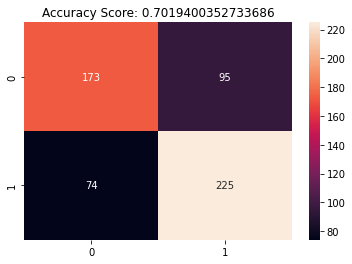

In [102]:
cm_def_model_1 = confusion_matrix(Y_test, Y_pred_def_model_1)
acc_def_model_1 = accuracy_score(Y_test, Y_pred_def_model_1)
sns.heatmap(cm_def_model_1, annot = True, fmt='g')
plt.title('Accuracy Score: {0}'.format(acc_def_model_1))
plt.show()

In [103]:
print(classification_report(Y_test, Y_pred_def_model_1))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       268
           1       0.70      0.75      0.73       299

    accuracy                           0.70       567
   macro avg       0.70      0.70      0.70       567
weighted avg       0.70      0.70      0.70       567



## Model 2: random search

In [65]:
# Define evaluation

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

In [75]:
# Define search space

space = dict()
space['solver'] = ['newtong-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

In [76]:
# Define search

search = RandomizedSearchCV(lr, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

In [77]:
# Execute search

result = search.fit(X_train, Y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10050 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-pack

In [78]:
# Summarize result

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6548112706007443
Best Hyperparameters: {'C': 1.657525997964347, 'penalty': 'l2', 'solver': 'lbfgs'}


In [79]:
lr_def_model_2 = LogisticRegression(C=1.657525997964347,
                                    penalty='l2',
                                    solver='lbfgs')

In [80]:
lr_def_model_2.fit(X_train, Y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.657525997964347)

In [81]:
Y_pred_def_model_2 = lr_def_model_2.predict(X_test)

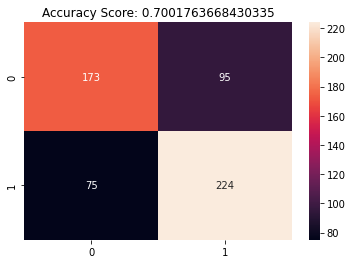

In [82]:
cm_def_model_2 = confusion_matrix(Y_test, Y_pred_def_model_2)
acc_def_model_2 = accuracy_score(Y_test, Y_pred_def_model_2)
sns.heatmap(cm_def_model_2, annot = True, fmt='g')
plt.title('Accuracy Score: {0}'.format(acc_def_model_2))
plt.show()

In [83]:
print(classification_report(Y_test, Y_pred_def_model_2))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       268
           1       0.70      0.75      0.72       299

    accuracy                           0.70       567
   macro avg       0.70      0.70      0.70       567
weighted avg       0.70      0.70      0.70       567



## Modelo 3: grid search

In [84]:
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

In [85]:
# define search
search = GridSearchCV(lr, space, scoring='accuracy', n_jobs=-1, cv=cv)

In [86]:
# Execute search

result = search.fit(X_train, Y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1440 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-package

In [87]:
# Summarize result

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6540593909014962
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [89]:
lr_def_model_3 = LogisticRegression(C=10,
                                    penalty='l2',
                                    solver='newton-cg')

In [90]:
lr_def_model_3.fit(X_train, Y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, solver='newton-cg')

In [91]:
Y_pred_def_model_3 = lr_def_model_3.predict(X_test)

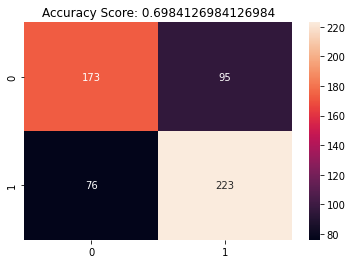

In [92]:
cm_def_model_3 = confusion_matrix(Y_test, Y_pred_def_model_3)
acc_def_model_3 = accuracy_score(Y_test, Y_pred_def_model_3)
sns.heatmap(cm_def_model_3, annot = True, fmt='g')
plt.title('Accuracy Score: {0}'.format(acc_def_model_3))
plt.show()

In [93]:
print(classification_report(Y_test, Y_pred_def_model_3))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       268
           1       0.70      0.75      0.72       299

    accuracy                           0.70       567
   macro avg       0.70      0.70      0.70       567
weighted avg       0.70      0.70      0.70       567



## Modelo 4: Penalidad L1 con GridSearchCV

In [104]:
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l1']
space['C'] = np.logspace(-10, 10, 100)

In [105]:
# define search
search = GridSearchCV(lr, space, scoring='accuracy', n_jobs=-1, cv=cv)

In [106]:
# Execute search

result = search.fit(X_train, Y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6000 fits failed out of a total of 9000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packag

In [107]:
# Summarize result

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.654558745348219
Best Hyperparameters: {'C': 0.7924828983539186, 'penalty': 'l1', 'solver': 'liblinear'}


In [108]:
lr_def_model_4 = LogisticRegression(C=0.7924828983539186,
                                    penalty='l1',
                                    solver='liblinear')

In [109]:
lr_def_model_4.fit(X_train, Y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.7924828983539186, penalty='l1', solver='liblinear')

In [111]:
Y_pred_def_model_4 = lr_def_model_4.predict(X_test)

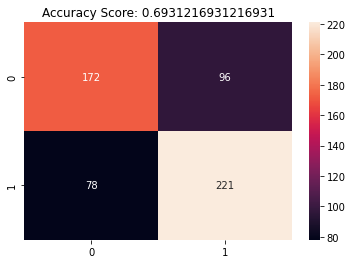

In [112]:
cm_def_model_4 = confusion_matrix(Y_test, Y_pred_def_model_4)
acc_def_model_4 = accuracy_score(Y_test, Y_pred_def_model_4)
sns.heatmap(cm_def_model_4, annot = True, fmt='g')
plt.title('Accuracy Score: {0}'.format(acc_def_model_4))
plt.show()

In [114]:
print(classification_report(Y_test, Y_pred_def_model_4))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66       268
           1       0.70      0.74      0.72       299

    accuracy                           0.69       567
   macro avg       0.69      0.69      0.69       567
weighted avg       0.69      0.69      0.69       567



In [115]:
print(classification_report(Y_test, Y_pred_def_model_4))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66       268
           1       0.70      0.74      0.72       299

    accuracy                           0.69       567
   macro avg       0.69      0.69      0.69       567
weighted avg       0.69      0.69      0.69       567



# Coeficientes y P_Valor

## Modelo 1

In [116]:
coef_m1 = lr_def_model_1.coef_[0]
nombres_variables = list(X.columns)

In [118]:
# Crear un dataframe con los coeficientes y los nombres de las variables independientes

df_coef_m1 = pd.DataFrame({'Variable' : nombres_variables,
                           'Coeficiente' : coef_m1})
df_coef_m1['p_valor'] = df_coef_m1['Coeficiente'].apply(lambda x: stats.norm.sf(abs(x))*2)
df_coef_m1 = df_coef_m1.sort_values(by = 'p_valor', ascending=True)

In [119]:
df_coef_m1

,Variable,Coeficiente,p_valor
18,seniority_MASTER,1.675967,0.093745
8,chapter_INTEGRACION,-1.453853,0.145987
14,chapter_SOA,1.258754,0.208119
4,area_TALENT POOL,-1.059430,0.289404
12,chapter_CLOUD OPS,-0.775999,0.437749
17,seniority_SENIOR,-0.644995,0.518931
11,chapter_EXPERIENCIA_USUARIO,-0.634912,0.525486
10,chapter_LIDERAZGO,-0.599411,0.548899
3,area_CUSTOMER SUCCESS,0.499584,0.617368
9,chapter_MOVIL,-0.471180,0.637512


## Modelo 4

In [120]:
coef_m4 = lr_def_model_4.coef_[0]
nombres_variables = list(X.columns)

In [121]:
# Crear un dataframe con los coeficientes y los nombres de las variables independientes

df_coef_m4 = pd.DataFrame({'Variable' : nombres_variables,
                           'Coeficiente' : coef_m4})
df_coef_m4['p_valor'] = df_coef_m4['Coeficiente'].apply(lambda x: stats.norm.sf(abs(x))*2)
df_coef_m4 = df_coef_m4.sort_values(by = 'p_valor', ascending=True)

In [122]:
df_coef_m4

,Variable,Coeficiente,p_valor
18,seniority_MASTER,1.946715,0.051569
14,chapter_SOA,1.611940,0.106975
8,chapter_INTEGRACION,-1.526538,0.126876
4,area_TALENT POOL,-1.177632,0.238943
12,chapter_CLOUD OPS,-0.783277,0.433464
11,chapter_EXPERIENCIA_USUARIO,-0.618730,0.536094
10,chapter_LIDERAZGO,-0.586240,0.557714
9,chapter_MOVIL,-0.450308,0.652488
3,area_CUSTOMER SUCCESS,0.403766,0.686385
17,seniority_SENIOR,-0.401104,0.688344
